UCSanDiegoX: DSE200x Python for Data Science

Week 3 - Jupyter Notebooks and Numpy

## Introduction to notebooks

An integral with LaTex:

$\int x^2 dx = \frac{x^3}3 +C$

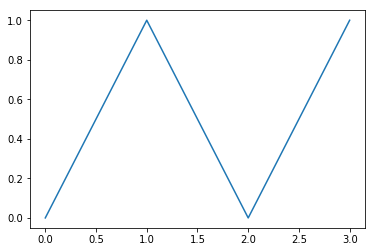

In [1]:
# plotting
%matplotlib inline
from matplotlib.pyplot import plot

plot([0,1,0,1])

## Introduction to numpy

### Numpy Array

In [2]:
import numpy as np

In [3]:
an_array = np.array([3, 33, 333])  # Create a rank 1 array

# Type is: "<class 'numpy.ndarray'>"
# Shape is monodimensional (rank 1)
print(type(an_array), an_array, an_array.shape) 

<class 'numpy.ndarray'> [  3  33 333] (3,)


In [4]:
# because this is a 1-rank array, we need only one index to accesss each element
print('First element:', an_array[0])
print('All elements:')
for element in an_array:
    print(element)

First element: 3
All elements:
3
33
333


In [5]:
# ndarrays are mutable, here we change an element of the array
an_array[0] = 42
print(an_array)

[ 42  33 333]


In [6]:
# Rank 2 numpy array
another = np.array([[11,12,13],[21,22,23]])   # Create a rank 2 array

print(another)  # print the array

print("The shape is 2 rows, 3 columns:", another.shape)  # rows x columns                   
print("Accessing [0,0], [0,1], [1,0]:", another[0, 0], another[0, 1], another[1, 0])
for row in another:
    print(row)

[[11 12 13]
 [21 22 23]]
The shape is 2 rows, 3 columns: (2, 3)
Accessing [0,0], [0,1], [1,0]: 11 12 21
[11 12 13]
[21 22 23]


In [7]:
# create a 2x2 array of zeros
ex1 = np.zeros((2,2))      
print(ex1)                              

[[0. 0.]
 [0. 0.]]


In [8]:
# create a 2x2 array filled with 9.0
ex2 = np.full((2,2), 9.)  
print(ex2)   

[[9. 9.]
 [9. 9.]]


In [9]:
# create a 2x2 matrix with the diagonal 1s and the others 0
ex3 = np.eye(2,2)
print(ex3)  

[[1. 0.]
 [0. 1.]]


In [10]:
# create an array of ones
ex4 = np.ones((1,2))
print(ex4)    

[[1. 1.]]


In [11]:
# notice that the above ndarray (ex4) is actually rank 2, it is a 2x1 array
print(ex4.shape)

# which means we need to use two indexes to access an element
print(ex4[0,1])

(1, 2)
1.0


In [12]:
# create an array of random floats between 0 and 1
ex5 = np.random.random((2,2))
print(ex5)    

[[0.30976227 0.14592707]
 [0.69422209 0.19288513]]


### Array Indexing

Slice indexing

In [13]:
# Rank 2 array of shape (3, 4)
an_array = np.array([[11,12,13,14], [21,22,23,24], [31,32,33,34]])
print(an_array)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]


In [14]:
# Use array slicing to get a subarray consisting of the first 2 rows x 2 columns
a_slice = an_array[:2, 1:3]
print(a_slice)

[[12 13]
 [22 23]]


In [15]:
# When you modify a slice, you actually modify the underlying array
print("Before:", an_array[0, 1])   #inspect the element at 0, 1  
a_slice[0, 0] = 1000    # a_slice[0, 0] is the same piece of data as an_array[0, 1]
print("After:", an_array[0, 1])    

Before: 12
After: 1000


In [16]:
# to work with a copy, explicitly say it
a_copy = a_slice.copy()
a_copy[0, 1] = 42
print(a_copy[0, 1] != a_slice[0, 1])

True


We can use combinations of integer indexing and slice indexing to create different shaped matrices

In [17]:
# Create a Rank 2 array of shape (3, 4)
an_array = np.array([[11,12,13,14], [21,22,23,24], [31,32,33,34]])
print(an_array)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]


In [18]:
# Using both integer indexing & slicing generates an array of lower rank
row_rank1 = an_array[1, :]    # Rank 1 view 

print(row_rank1, row_rank1.shape)  # notice only a single []

[21 22 23 24] (4,)


In [19]:
# Slicing alone: generates an array of the same rank as the an_array
row_rank2 = an_array[1:2, :]  # Rank 2 view 

print(row_rank2, row_rank2.shape)   # Notice the [[ ]]

[[21 22 23 24]] (1, 4)


In [20]:
#We can do the same thing for columns of an array:
col_rank1 = an_array[:, 1]
print(col_rank1, col_rank1.shape)  # Rank 1
print()

col_rank2 = an_array[:, 1:2]
print(col_rank2, col_rank2.shape)  # Rank 2

[12 22 32] (3,)

[[12]
 [22]
 [32]] (3, 1)


Array Indexing for changing elements

In [21]:
# Create a new array
an_array = np.array([[11,12,13], [21,22,23], [31,32,33], [41,42,43]])

print('Original Array:')
print(an_array)

Original Array:
[[11 12 13]
 [21 22 23]
 [31 32 33]
 [41 42 43]]


In [22]:
# Create an array of indices
col_indices = np.array([0, 1, 2, 0])
print('Col indices picked:', col_indices)

Col indices picked: [0 1 2 0]


In [23]:
# Examine the pairings of row_indices and col_indices.  These are the elements we'll change next.
for row, col in zip(range(4), col_indices):
    print(row, col)

0 0
1 1
2 2
3 0


In [24]:
# Select one element from each row
print('Values in the array at those indices:', an_array[range(4), col_indices])

Values in the array at those indices: [11 22 33 41]


In [25]:
# Change one element from each row using the indices selected
an_array[range(4), col_indices] += 100000

print('Changed Array:')
print(an_array)

Changed Array:
[[100011     12     13]
 [    21 100022     23]
 [    31     32 100033]
 [100041     42     43]]


### Boolean Indexing

In [26]:
# create a 3x2 array
an_array = np.array([[11,12], [21, 22], [31, 32]])
print(an_array)

[[11 12]
 [21 22]
 [31 32]]


In [27]:
# create a filter which will be boolean values for whether each element meets this condition
filter = (an_array > 15)
filter

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [28]:
# we can now select just those elements which meet that criteria
print(an_array[filter])

[21 22 31 32]


In [29]:
# For short, we could have just used the approach below without the need for the separate filter array
print(an_array[(an_array % 2 == 0)])
print(an_array[(an_array > 20) & (an_array % 2 == 0)])

[12 22 32]
[22 32]


In [30]:
an_array[an_array % 2 == 0] += 100
print(an_array)

[[ 11 112]
 [ 21 122]
 [ 31 132]]


## Datatypes and Array Operations

In [31]:
# Python type deduction
ex1 = np.array([11, 12])
ex2 = np.array([11.0, 12.0])
print(ex1.dtype, ex2.dtype)

int32 float64


In [32]:
# explicit data set
ex3 = np.array([11, 21], dtype=np.int64)

# float truncated to int
ex4 = np.array([11.1,12.7], dtype=np.int64)
ex5 = np.array([11, 21], dtype=np.float64)

print(ex3, ex3.dtype, ex4, ex4.dtype, ex5, ex5.dtype)

[11 21] int64 [11 12] int64 [11. 21.] float64


### Arithmetic Array Operations

In [33]:
x = np.array([[111,112],[121,122]], dtype=np.int)
y = np.array([[211.1,212.1],[221.1,222.1]], dtype=np.float64)

print(x)
print(y)

[[111 112]
 [121 122]]
[[211.1 212.1]
 [221.1 222.1]]


In [34]:
# add
print(x + y)         # The plus sign works
print(np.add(x, y))  # so does the numpy function "add"

[[322.1 324.1]
 [342.1 344.1]]
[[322.1 324.1]
 [342.1 344.1]]


In [35]:
# subtract
print(x - y)
print(np.subtract(x, y))

[[-100.1 -100.1]
 [-100.1 -100.1]]
[[-100.1 -100.1]
 [-100.1 -100.1]]


In [36]:
# multiply
print(x * y)
print(np.multiply(x, y))

[[23432.1 23755.2]
 [26753.1 27096.2]]
[[23432.1 23755.2]
 [26753.1 27096.2]]


In [37]:
# divide
print(x / y)
print(np.divide(x, y))

[[0.52581715 0.52805281]
 [0.54726368 0.54930212]]
[[0.52581715 0.52805281]
 [0.54726368 0.54930212]]


In [38]:
# square root
print(np.sqrt(x))

[[10.53565375 10.58300524]
 [11.         11.04536102]]


In [39]:
# exponent (e ** x)
print(np.exp(x))

[[1.60948707e+48 4.37503945e+48]
 [3.54513118e+52 9.63666567e+52]]


## Basic Statistical Operations

In [40]:
# setup a random 2 x 4 matrix
arr = 10 * np.random.randn(2,5)
print(arr)

[[  6.45114755 -16.14232132  10.48396922 -16.10734759  -5.06325265]
 [ 12.11880134  11.80838323   0.11117273  22.65100801   7.13535225]]


In [41]:
# compute the mean for all elements
print(arr.mean())

3.344691277333122


In [42]:
# compute the means by row
print(arr.mean(axis = 1))

[-4.07556096 10.76494351]


In [43]:
# compute the means by column
print(arr.mean(axis = 0))

[ 9.28497444 -2.16696904  5.29757098  3.27183021  1.0360498 ]


In [44]:
# sum all the elements
print(arr.sum())

33.44691277333122


In [45]:
# compute the medians
print(np.median(arr))
print(np.median(arr, axis = 0))
print(np.median(arr, axis = 1))

6.793249898892024
[ 9.28497444 -2.16696904  5.29757098  3.27183021  1.0360498 ]
[-5.06325265 11.80838323]


### Sorting

In [46]:
# create a 10 element array of randoms
unsorted = np.random.randn(10)
print(unsorted)

[ 1.08035309 -0.58220781  0.84844426  1.03389287  2.05832802  1.5337192
 -1.0661897  -0.45205501  2.13236097 -0.55393496]


In [47]:
# create copy and sort
sorted1 = np.array(unsorted)
sorted1.sort()

sorted2 = unsorted.copy()
sorted2.sort()

sorted3 = sorted(unsorted)

print(unsorted)
print(sorted1)
print(sorted2)
print(sorted3)

[ 1.08035309 -0.58220781  0.84844426  1.03389287  2.05832802  1.5337192
 -1.0661897  -0.45205501  2.13236097 -0.55393496]
[-1.0661897  -0.58220781 -0.55393496 -0.45205501  0.84844426  1.03389287
  1.08035309  1.5337192   2.05832802  2.13236097]
[-1.0661897  -0.58220781 -0.55393496 -0.45205501  0.84844426  1.03389287
  1.08035309  1.5337192   2.05832802  2.13236097]
[-1.0661897009331163, -0.5822078144365921, -0.5539349626024814, -0.4520550139987761, 0.8484442625260752, 1.0338928709863915, 1.0803530907625196, 1.533719201942384, 2.058328021465232, 2.1323609735066467]


In [48]:
# inplace sorting
unsorted.sort() 

print(unsorted)

[-1.0661897  -0.58220781 -0.55393496 -0.45205501  0.84844426  1.03389287
  1.08035309  1.5337192   2.05832802  2.13236097]


### Finding Unique elements

In [49]:
array = np.array([1,2,1,4,2,1,4,2])

print(np.unique(array))

[1 2 4]


### Set Operations

In [50]:
s1 = np.array(['desk','chair','bulb'])
s2 = np.array(['lamp','bulb','chair'])
print(s1, s2)

['desk' 'chair' 'bulb'] ['lamp' 'bulb' 'chair']


In [51]:
print(np.intersect1d(s1, s2))

['bulb' 'chair']


In [52]:
print(np.union1d(s1, s2))

['bulb' 'chair' 'desk' 'lamp']


In [53]:
print(np.setdiff1d(s1, s2)) # elements in s1 that are not in s2

['desk']


In [54]:
print(np.in1d(s1, s2)) #which element of s1 is also in s2

[False  True  True]


## Broadcasting

In [55]:
start = np.zeros((4,3))
print(start)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [56]:
# create a rank 1 ndarray with 3 values
add_rows = np.array([1, 0, 2])
print(add_rows)

[1 0 2]


In [57]:
y = start + add_rows  # add to each row of 'start' using broadcasting
print(y)

[[1. 0. 2.]
 [1. 0. 2.]
 [1. 0. 2.]
 [1. 0. 2.]]


In [58]:
# create an ndarray which is 4 x 1 to broadcast across columns
add_cols = np.array([[0,1,2,3]])
add_cols = add_cols.T

print(add_cols)

[[0]
 [1]
 [2]
 [3]]


In [59]:
# add to each column of 'start' using broadcasting
y = start + add_cols 
print(y)

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [60]:
# this will just broadcast in both dimensions
add_scalar = np.array([1])  
print(start+add_scalar)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [61]:
# create our 3x4 matrix
arrA = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(arrA)

# create our 4x1 array
arrB = [0,1,0,2]
print(arrB)

# add the two together using broadcasting
print(arrA + arrB)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[0, 1, 0, 2]
[[ 1  3  3  6]
 [ 5  7  7 10]
 [ 9 11 11 14]]


In [62]:
a = np.array([[0,0],[0,0]])
b1 = np.array([1,1])
b2 = 1

print(a+b1)
print(a+b2)

[[1 1]
 [1 1]]
[[1 1]
 [1 1]]


## Speedtest: ndarrays vs lists

In [63]:
import timeit

In [64]:
size    = 100_000
timeits = 1_000

In [65]:
# create the ndarray with values 0,1,2...,size-1
nd_array = np.arange(size)

timer_numpy = timeit.Timer('nd_array.sum()', 'from __main__ import nd_array')

print("Time taken by numpy ndarray: {:f} seconds".format(timer_numpy.timeit(timeits)/timeits))

Time taken by numpy ndarray: 0.000060 seconds


In [67]:
# create the list with values 0,1,2...,size-1
a_list = list(range(size))

timer_list = timeit.Timer('sum(a_list)', 'from __main__ import a_list')
print("Time taken by list: {:f} seconds".format(timer_list.timeit(timeits)/timeits))

Time taken by list: 0.002050 seconds


### Read or Write to Disk

In [68]:
# Binary Format
x = np.array([ 23.23, 24.24] )
np.save('an_array', x)
y = np.load('an_array.npy')
print(x, y)

[23.23 24.24] [23.23 24.24]


In [69]:
# Text Format
np.savetxt('array.txt', X=x, delimiter=',')
y = np.loadtxt('array.txt', delimiter=',')
print(x, y)

[23.23 24.24] [23.23 24.24]


### Dot Product on Matrices and Inner Product on Vectors

In [70]:
# determine the dot product of two matrices
x2d = np.array([[1,1],[1,1]])
y2d = np.array([[2,2],[2,2]])

print(x2d.dot(y2d))
print(np.dot(x2d, y2d))

[[4 4]
 [4 4]]
[[4 4]
 [4 4]]


In [71]:
# determine the inner product of two vectors
a1d = np.array([9 , 9 ])
b1d = np.array([10, 10])

print(a1d.dot(b1d))
print(np.dot(a1d, b1d))

180
180


In [72]:
# dot produce on an array and vector
print(x2d.dot(a1d))
print(np.dot(x2d, a1d))

[18 18]
[18 18]


### Sum

In [73]:
# sum elements in the array
ex1 = np.array([[11,12],[21,22]])

print(np.sum(ex1))          # add all members
print(np.sum(ex1, axis=0))  # columnwise sum
print(np.sum(ex1, axis=1))  # rowwise sum

66
[32 34]
[23 43]


### Element-wise Functions

In [74]:
# random array
x = np.random.randn(8)
x

array([-0.32526407,  1.62380646, -0.48814994, -0.03741153, -0.2926672 ,
        0.33410054, -0.15175754, -0.23557716])

In [75]:
# another random array
y = np.random.randn(8)
y

array([ 0.75470665, -1.23198266,  0.05122374,  0.36580569,  0.19599694,
       -0.45553204,  0.64010154, -1.64148845])

In [76]:
# returns element wise maximum between two arrays

np.maximum(x, y)

array([ 0.75470665,  1.62380646,  0.05122374,  0.36580569,  0.19599694,
        0.33410054,  0.64010154, -0.23557716])

### Reshaping array

In [77]:
# grab values from 0 through 19 in an array
arr = np.arange(20)
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [78]:
# reshape to be a 4 x 5 matrix
arr.reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### Transpose

In [79]:
# transpose
ex1 = np.array([[11,12],[21,22]])

ex1.T

array([[11, 21],
       [12, 22]])

### Indexing using where()

In [80]:
x_1 = np.array([1,2,3,4,5])
y_1 = np.array([11,22,33,44,55])

filter = np.array([True, False, True, False, True])

In [81]:
out = np.where(filter, x_1, y_1)
print(out)

[ 1 22  3 44  5]


In [82]:
mat = np.random.rand(5,5)
mat

array([[0.30988365, 0.20533157, 0.74766102, 0.29035131, 0.20275257],
       [0.35176555, 0.56580231, 0.79967129, 0.56700379, 0.67365701],
       [0.52400806, 0.41765797, 0.84929794, 0.13077223, 0.89048983],
       [0.37391344, 0.77257897, 0.66830494, 0.74795253, 0.20168221],
       [0.94545281, 0.44687554, 0.20057078, 0.60714561, 0.65017038]])

In [83]:
np.where( mat > 0.5, 1000, -1)

array([[  -1,   -1, 1000,   -1,   -1],
       [  -1, 1000, 1000, 1000, 1000],
       [1000,   -1, 1000,   -1, 1000],
       [  -1, 1000, 1000, 1000,   -1],
       [1000,   -1,   -1, 1000, 1000]])

### "any" or "all" conditionals

In [84]:
arr_bools = np.array([ True, False, True, True, False ])

In [85]:
arr_bools.any()

True

In [86]:
arr_bools.all()

False

### Random Number Generation

In [87]:
Y = np.random.normal(size = (1,5))[0]
print(Y)

Y2 = np.random.normal(size = (2,5))
print(Y2)

[ 0.07105524  0.17506588 -2.0011555   0.60110194  0.9268146 ]
[[-0.95781415  1.10565065  0.15488949 -0.75710282  0.05243341]
 [-1.53839136 -1.63785526 -1.20632328 -0.15395402 -0.19183332]]


In [88]:
Z = np.random.randint(low=2,high=50,size=4)
print(Z)

[29  8  8 21]


In [89]:
np.random.permutation(Z) #return a new ordering of elements in Z

array([21,  8, 29,  8])

In [90]:
np.random.uniform(size=4) #uniform distribution

array([0.3607489 , 0.71508349, 0.62298612, 0.18323977])

In [91]:
np.random.normal(size=4) #normal distribution

array([ 0.50021202,  0.83221086, -1.02993672, -0.10090238])

### Merging data sets

In [92]:
K = np.random.randint(low=2,high=50,size=(2,2))
print(K)
M = np.random.randint(low=2,high=50,size=(2,2))
print(M)

[[25 47]
 [27  8]]
[[29  9]
 [23 31]]


In [93]:
np.vstack((K,M))

array([[25, 47],
       [27,  8],
       [29,  9],
       [23, 31]])

In [94]:
np.hstack((K,M))

array([[25, 47, 29,  9],
       [27,  8, 23, 31]])

In [95]:
np.concatenate([K, M], axis = 0)

array([[25, 47],
       [27,  8],
       [29,  9],
       [23, 31]])

In [96]:
np.concatenate([K, M.T], axis = 1)

array([[25, 47, 29, 23],
       [27,  8,  9, 31]])